In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')

import datetime
import json
import time
import glob
import sys
import os
import gc

from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold, train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# import nltk
# nltk.download('movie_reviews')

In [3]:
from nltk.corpus import movie_reviews

In [4]:
negids = movie_reviews.fileids('neg')
posids = movie_reviews.fileids('pos')

In [5]:
negfeats = [movie_reviews.words(fileids=[f]) for f in negids]
posfeats = [movie_reviews.words(fileids=[f]) for f in posids]

In [6]:
movie_reviews.categories()

['neg', 'pos']

In [7]:
documents = [(list(movie_reviews.words(fileid)), category)
              for category in movie_reviews.categories()
              for fileid in movie_reviews.fileids(category)]

In [195]:
docs = [list(movie_reviews.words(fileid)) for fileid in movie_reviews.fileids()]

In [174]:
docs[:1]

[['plot',
  ':',
  'two',
  'teen',
  'couples',
  'go',
  'to',
  'a',
  'church',
  'party',
  ',',
  'drink',
  'and',
  'then',
  'drive',
  '.',
  'they',
  'get',
  'into',
  'an',
  'accident',
  '.',
  'one',
  'of',
  'the',
  'guys',
  'dies',
  ',',
  'but',
  'his',
  'girlfriend',
  'continues',
  'to',
  'see',
  'him',
  'in',
  'her',
  'life',
  ',',
  'and',
  'has',
  'nightmares',
  '.',
  'what',
  "'",
  's',
  'the',
  'deal',
  '?',
  'watch',
  'the',
  'movie',
  'and',
  '"',
  'sorta',
  '"',
  'find',
  'out',
  '.',
  '.',
  '.',
  'critique',
  ':',
  'a',
  'mind',
  '-',
  'fuck',
  'movie',
  'for',
  'the',
  'teen',
  'generation',
  'that',
  'touches',
  'on',
  'a',
  'very',
  'cool',
  'idea',
  ',',
  'but',
  'presents',
  'it',
  'in',
  'a',
  'very',
  'bad',
  'package',
  '.',
  'which',
  'is',
  'what',
  'makes',
  'this',
  'review',
  'an',
  'even',
  'harder',
  'one',
  'to',
  'write',
  ',',
  'since',
  'i',
  'generally',
  'a

In [35]:
documents[:1]

[(['plot',
   ':',
   'two',
   'teen',
   'couples',
   'go',
   'to',
   'a',
   'church',
   'party',
   ',',
   'drink',
   'and',
   'then',
   'drive',
   '.',
   'they',
   'get',
   'into',
   'an',
   'accident',
   '.',
   'one',
   'of',
   'the',
   'guys',
   'dies',
   ',',
   'but',
   'his',
   'girlfriend',
   'continues',
   'to',
   'see',
   'him',
   'in',
   'her',
   'life',
   ',',
   'and',
   'has',
   'nightmares',
   '.',
   'what',
   "'",
   's',
   'the',
   'deal',
   '?',
   'watch',
   'the',
   'movie',
   'and',
   '"',
   'sorta',
   '"',
   'find',
   'out',
   '.',
   '.',
   '.',
   'critique',
   ':',
   'a',
   'mind',
   '-',
   'fuck',
   'movie',
   'for',
   'the',
   'teen',
   'generation',
   'that',
   'touches',
   'on',
   'a',
   'very',
   'cool',
   'idea',
   ',',
   'but',
   'presents',
   'it',
   'in',
   'a',
   'very',
   'bad',
   'package',
   '.',
   'which',
   'is',
   'what',
   'makes',
   'this',
   'review',
   'an'

In [10]:
len(documents)

2000

In [24]:
len(movie_reviews.fileids())

2000

In [13]:
with open('answer1.txt', 'w') as f:
    f.write(str(len(documents)))

In [95]:
df = pd.DataFrame.from_records(documents, exclude=['docs'], columns = ['docs' , 'cat']) 
df.cat = df.cat.map({'neg':0, 'pos':1})

Proportion: 0.5 : 1


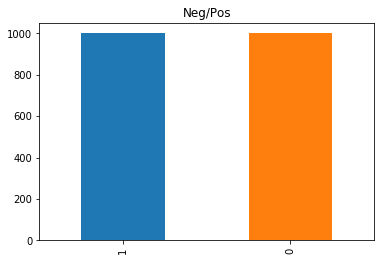

In [129]:
counts = df.cat.value_counts()
p = np.round(counts[1] / sum(counts), 2)
print('Proportion:', p , ': 1')

counts.plot(kind='bar', title='Neg/Pos');

In [132]:
with open ('answer2.txt', 'w') as f:
    f.write(str(p))

In [196]:
docs = [" ".join(x) for x in docs]

In [186]:
#tokenizer=lambda doc: doc, lowercase=False

In [197]:
vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(docs)

In [198]:
bow

<2000x39659 sparse matrix of type '<class 'numpy.int64'>'
	with 666842 stored elements in Compressed Sparse Row format>

In [160]:
with open('answer3.txt', 'w') as f:
    f.write(str(bow.shape[1]))

In [178]:
LR = linear_model.LogisticRegression()

In [179]:
cross_val_score(LR, bow, df.cat, scoring = 'accuracy')

array([0.81437126, 0.84684685, 0.84684685])

In [199]:
mean_acc = np.mean(cross_val_score(LR, bow, df.cat, scoring = 'accuracy'))
mean_acc

0.8360216503929078

In [201]:
mean_roc_auc = np.mean(cross_val_score(LR, bow, df.cat, scoring = 'roc_auc'))
mean_roc_auc

0.9107764937833774

In [181]:
from sklearn.pipeline import Pipeline, make_pipeline

In [202]:
mp = make_pipeline(vectorizer, LR)
cross_val_score(mp, bow, df.cat, scoring = 'roc_auc')

AttributeError: lower not found